# ffn - Financial Functions for Python
https://pmorissette.github.io/ffn/


In [1]:
import ffn

# Download price data from Yahoo! Finance. By default, the Adj. Close will be used
prices = ffn.get('metr.ba, dgcu2.ba, gban.ba, cgpa2.ba, ^MERV', start='2023-11-17')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


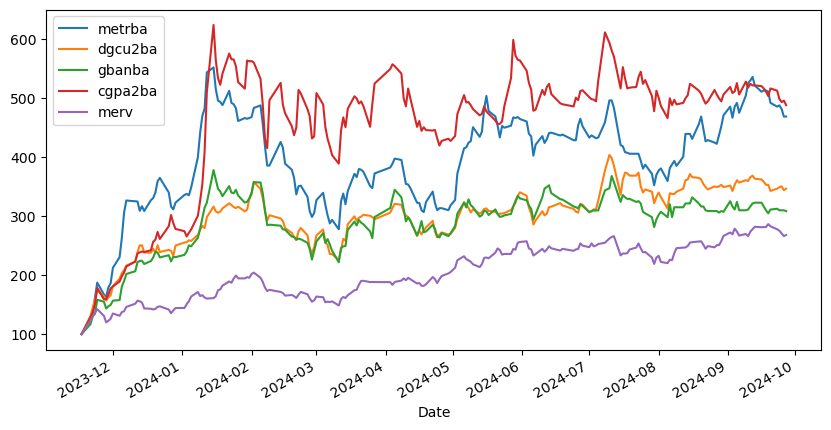

In [2]:
# Let's compare the relative performance of each stock
# We will rebase here to get a common starting point
ax = prices.rebase().plot(figsize=(10, 5))

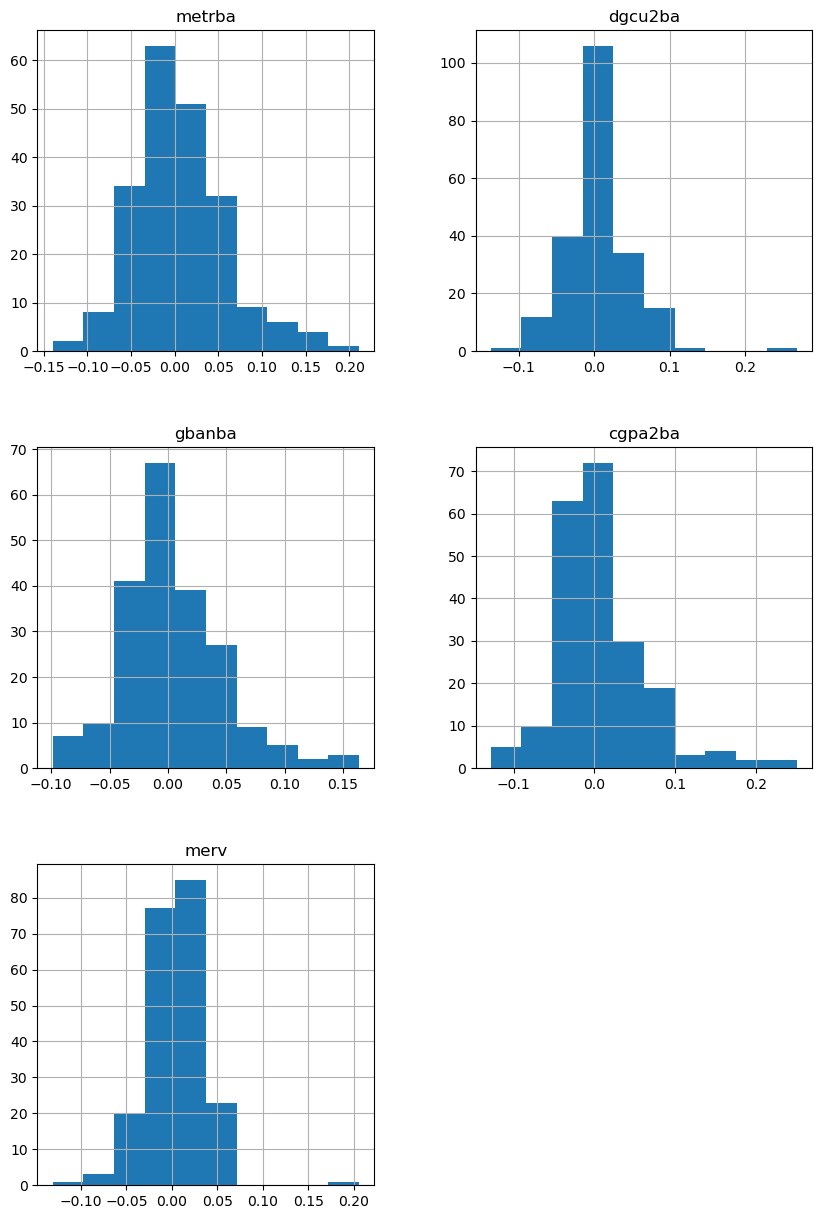

In [3]:
# What do the return distributions look like?
returns = prices.to_log_returns().dropna()
ax = returns.hist(figsize=(10, 15))

In [4]:
# Some performance metrics
stats = prices.calc_stats()
stats.display()

Stat                 metrba      dgcu2ba     gbanba      cgpa2ba     merv
-------------------  ----------  ----------  ----------  ----------  ----------
Start                2023-11-17  2023-11-17  2023-11-17  2023-11-17  2023-11-17
End                  2024-09-27  2024-09-27  2024-09-27  2024-09-27  2024-09-27
Risk-free rate       0.00%       0.00%       0.00%       0.00%       0.00%

Total Return         368.49%     246.34%     208.39%     387.77%     167.84%
Daily Sharpe         2.57        2.45        2.23        2.48        2.49
Daily Sortino        5.81        5.44        4.83        6.29        4.82
CAGR                 499.36%     322.25%     269.08%     528.07%     213.42%
Max Drawdown         -49.70%     -37.01%     -41.33%     -37.67%     -27.23%
Calmar Ratio         10.05       8.71        6.51        14.02       7.84

MTD                  -0.45%      -0.74%      0.42%       -3.56%      0.59%
3m                   0.81%       8.01%       -3.47%      -4.68%      5.63%
6m    

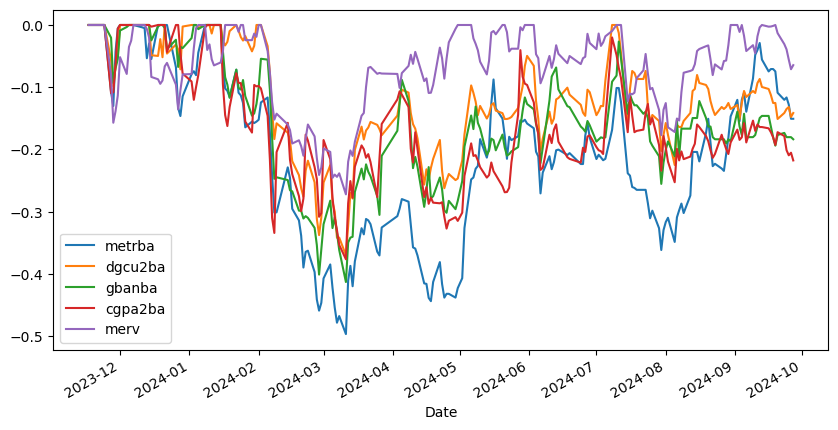

In [5]:
# Drawdowns
ax = stats.prices.to_drawdown_series().plot(figsize=(10, 5))

In [6]:
# Correlation between returns
returns.corr().as_format('.2f')

,metrba,dgcu2ba,gbanba,cgpa2ba,merv
metrba,1.00,0.74,0.68,0.63,0.62
dgcu2ba,0.74,1.00,0.71,0.69,0.69
gbanba,0.68,0.71,1.00,0.67,0.57
cgpa2ba,0.63,0.69,0.67,1.00,0.47
merv,0.62,0.69,0.57,0.47,1.00


<module 'matplotlib.pyplot' from 'c:\\Users\\nakki\\anaconda3\\envs\\panditas\\Lib\\site-packages\\matplotlib\\pyplot.py'>

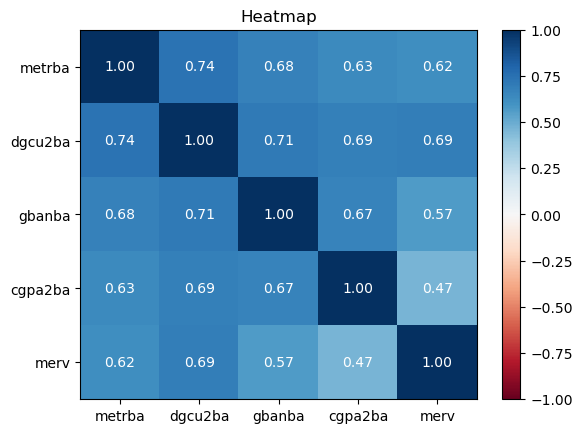

In [7]:
# as a heat map
returns.plot_corr_heatmap()

<Axes: title={'center': 'Equity Progression'}, xlabel='Date'>

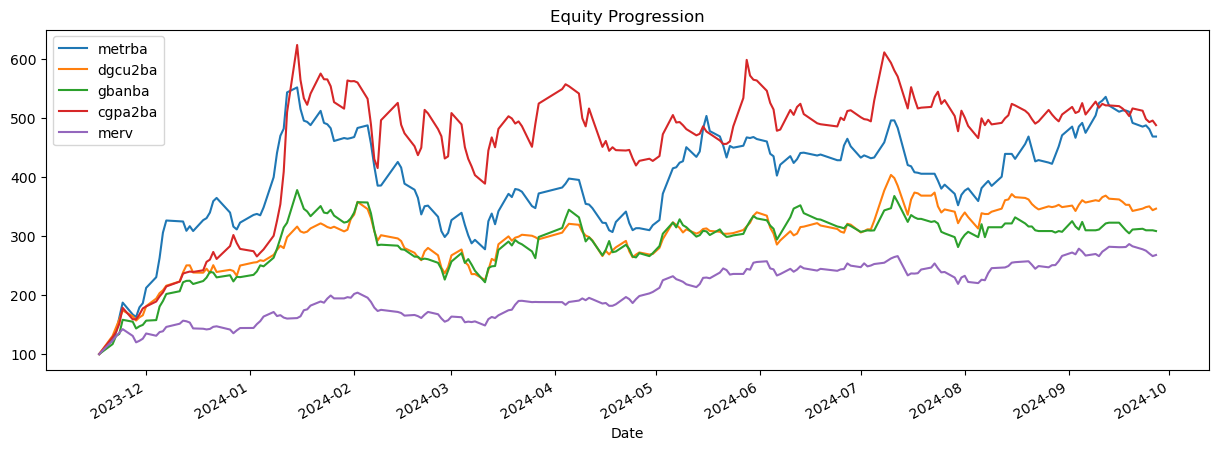

In [8]:
stats.plot()

In [9]:
stats['metrba'].display_monthly_returns()

  Year    Jan     Feb    Mar     Apr    May    Jun     Jul    Aug    Sep    Oct    Nov    Dec     YTD
------  -----  ------  -----  ------  -----  -----  ------  -----  -----  -----  -----  -----  ------
  2023    0      0      0       0      0      0       0      0      0         0  86.13  73.36  222.69
  2024   44.4  -34.49  21.89  -14.46  45.87  -2.67  -18.18  27.27  -0.45      0   0      0      45.18


<Axes: title={'center': 'metrba Return Histogram'}, ylabel='Density'>

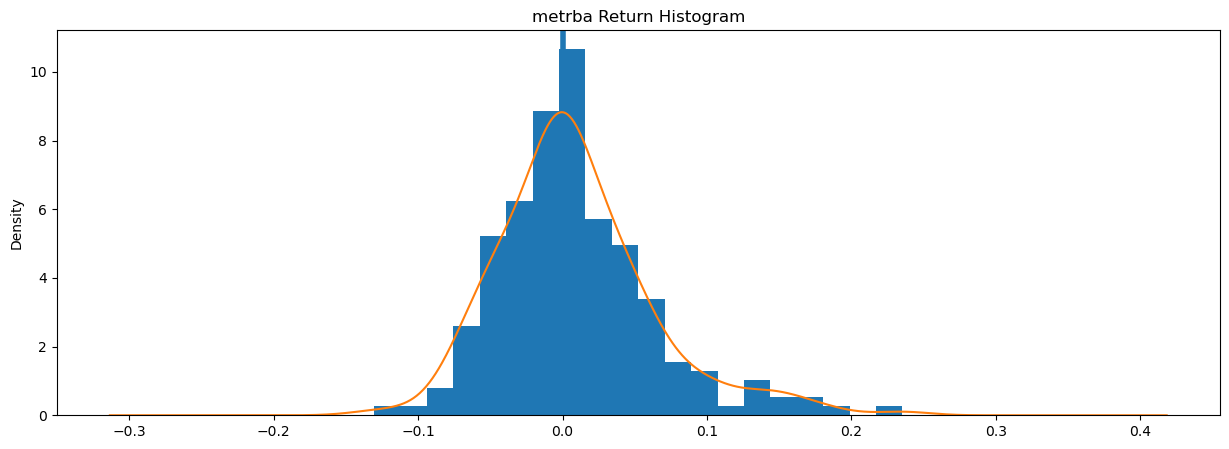

In [57]:
stats['metrba'].plot_histogram()